In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

mercedes_data=pd.read_csv('Mercedes.csv')


cat_cols=[col for col in mercedes_data.columns if mercedes_data[col].dtype=='object']

target=mercedes_data['y']

mercedes_data.drop(columns='y',inplace=True)

cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

mercedes_data.drop(columns=cols_to_drop,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(mercedes_data,target,test_size=0.2,random_state=42)

target.describe()


le=LabelEncoder()



cols_to_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [2]:
cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

[]

In [3]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [4]:
le=LabelEncoderExt()

cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    

X_train.values

array([[34, 24, 17, ...,  0,  0,  0],
       [35, 21, 17, ...,  0,  0,  0],
       [27,  5, 33, ...,  0,  0,  0],
       ...,
       [45, 25,  4, ...,  0,  0,  0],
       [45, 20,  9, ...,  0,  0,  0],
       [22,  2,  8, ...,  0,  0,  0]], dtype=int64)

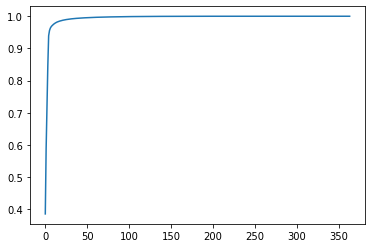

In [5]:
from sklearn.decomposition import  PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

plt.plot(np.cumsum(pca.explained_variance_ratio_))



In [6]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_df.values, i) for i in range(X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns
vif

,VIF Factor,Column Name
0,2.675180,X0
1,6.709193,X1
2,19.729722,X2
3,2.896552,X3
4,1.040918,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.413636,X383
362,1.442836,X384


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(X_test_pca_df)

r2_score(y_true=y_test,y_pred=y_linreg_pred)
print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('Test Score:----',lin_reg.score(X_test_pca_df,y_test))

mean_squared_error(y_test,y_linreg_pred)

Train Score:---- 0.5198013323067845
Test Score:---- 0.5381427414021187


71.88805442511928

In [10]:
import pickle

pickle.dump(lin_reg, open('model.pkl','wb'))


In [11]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1)
lasso.fit(X_train_pca_df,y_train)
y_lasso_pred=lasso.predict(X_test_pca_df)

lasso.score(X_test_pca_df,y_test)

0.4596827029292013

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
regress=GradientBoostingRegressor()
regress.fit(X_train_pca_df,y_train)
regress_predict=regress.predict(X_test_pca_df)

In [13]:
print('train score:---',regress.score(X_train_pca_df,y_train))
print('test score:---',regress.score(X_test_pca_df,y_test))

train score:--- 0.6901557505803431
test score:--- 0.5129532506967325


In [14]:
from sklearn.model_selection import GridSearchCV
dict={'max_depth':[3,5,7,9],
     'min_samples_split':[4,7,5,8],
     'min_samples_leaf':[4,5,6]}
grid=GridSearchCV(regress,dict,cv=5)
grid.fit(X_train_pca_df,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [15]:
grid.predict(X_test_pca_df)


array([ 96.83375224,  93.60707754, 112.40542553,  78.26247412,
       107.60340283,  97.81368607,  93.01297212, 101.09623653,
       103.49142864, 113.00269782,  79.3385581 ,  93.61552327,
        95.99644863, 103.6528672 ,  98.63587568,  94.5601155 ,
       109.48598395,  95.50802423,  94.52250132, 114.86106145,
       114.05890345,  92.75888778,  99.5453828 , 104.1078363 ,
        96.1693078 , 110.79708483,  94.98324586,  78.4659974 ,
        94.25132457,  93.5414987 ,  93.08583354,  99.67048318,
        96.00197822, 114.34181279,  97.36435321, 115.44315024,
       115.02339097,  96.5795493 ,  92.81514663,  95.69707308,
       111.74673093, 113.1848484 ,  98.53216676, 117.14657175,
        95.97839789,  96.4055777 ,  92.19098209, 104.42763986,
       107.40394597, 104.4503327 ,  94.50670195,  97.9295208 ,
       108.35070129, 105.39672807,  92.85494587,  93.35476415,
        95.19459078, 111.83307879, 102.75818617,  92.41898555,
       111.18101058,  77.41432026,  94.87399393,  92.26

In [16]:
#r2_score(y_test,tree_predict)
print('Train Score:----',grid.score(X_train_pca_df,y_train))
print('Test Score:----',grid.score(X_test_pca_df,y_test))

Train Score:---- 0.6496095777522024
Test Score:---- 0.5280181015356974


In [17]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 5}

In [18]:
from functools import reduce

list_a=[1,2,2,2]

reduce(lambda x,y:x+y,list_a)

7